In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\users\james_lorisystems2\anaconda3\lib\site-packages (0.0)


You should consider upgrading via the 'C:\Users\james_lorisystems2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings

warnings.filterwarnings("ignore")

import pytz

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to handles oversampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from collections import Counter
# # Library to split data
from sklearn.model_selection import train_test_split

# # Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

from pandas_profiling import ProfileReport 

# # Libraries different ensemble classifiers
# from sklearn.ensemble import (
#     BaggingClassifier,
#     RandomForestClassifier,
#     AdaBoostClassifier,
#     GradientBoostingClassifier,
#     StackingClassifier,
# )

# from xgboost import XGBClassifier


# # Libraries to get different metric scores
# from sklearn import metrics
# from sklearn.metrics import (
#     confusion_matrix,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     classification_report,
# )

# # To tune different models
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Customers clean-up

In [3]:
ke_cust = pd.read_csv('kenya_customers.csv')
ke_cust.sample(5)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
1392,4010581,WEB,0,2021-07-27T09:20:24.000Z,en,0,32,5.0,NaN
417,3758704,WEB,0,2021-06-12T07:51:58.000Z,en,0,0,2.0,NaN
324,3733437,WEB,0,2021-06-07T15:20:17.000Z,en,0,43,4.0,NaN
1534,4016529,WEB,0,2021-07-28T12:19:10.000Z,en,0,0,2.0,NaN
568,3838361,WEB,0,2021-06-26T16:03:33.000Z,en,0,3,1.0,NaN


In [4]:
ke_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 4177 non-null   int64  
 1   Last Used Platform          4177 non-null   object 
 2   Is Blocked                  4177 non-null   int64  
 3   Created At                  4177 non-null   object 
 4   Language                    4177 non-null   object 
 5   Outstanding Amount          4177 non-null   int64  
 6   Loyalty Points              4177 non-null   int64  
 7   Number of employees         3139 non-null   float64
 8   Upload restuarant location  19 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 293.8+ KB


In [5]:
ke_cust.loc[ke_cust['Upload restuarant location'].notnull()] # this column doesn't seem to have any useful info - to delete

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
1143,3975395,WEB,0,2021-07-20T16:12:08.000Z,en,0,48,3.0,[]
1144,3975487,WEB,0,2021-07-20T16:28:34.000Z,en,0,18,3.0,[]
1145,3975691,WEB,0,2021-07-20T17:08:50.000Z,en,0,0,2.0,[]
1146,3975902,WEB,0,2021-07-20T18:03:21.000Z,en,0,10,3.0,[]
1148,3977423,WEB,0,2021-07-21T04:10:59.000Z,en,0,0,2.0,[]
1149,3977726,WEB,0,2021-07-21T06:01:16.000Z,en,0,0,3.0,[]
1150,3977964,WEB,0,2021-07-21T07:01:15.000Z,en,0,3,3.0,[]
1151,3978305,WEB,0,2021-07-21T08:03:22.000Z,en,0,0,2.0,[]
1152,3978410,WEB,0,2021-07-21T08:26:42.000Z,en,0,0,3.0,[]
1153,3978550,WEB,0,2021-07-21T08:54:59.000Z,en,0,5,3.0,[]


In [6]:
ke_cust.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of employees', 'Upload restuarant location'],
      dtype='object')

In [7]:
# dropping irrelevant column
ke_cust.drop(columns = ['Upload restuarant location'], inplace=True)

# Creating a new column to identify the country of the customer
ke_cust['Country'] = 'Kenya'

# Rename columns correctly
ke_cust.rename(columns={'Number of employees' : 'Number of Employees'}, inplace=True)

ke_cust.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Country
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,Kenya
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,Kenya
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,Kenya
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,Kenya
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,Kenya


In [8]:
ng_cust = pd.read_csv('nigeria_customers.csv')

# Creating a new column to identify the country of the customer
ng_cust['Country'] = 'Nigeria'

ng_cust.sample(5)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Country
117,4162337,WEB,0,2021-08-25T12:05:30.000Z,en,0,43,2.0,Nigeria
405,4379838,WEB,0,2021-10-08T19:07:32.000Z,en,0,0,NaN,Nigeria
13,4070117,WEB,0,2021-08-07T13:37:42.000Z,en,0,0,5.0,Nigeria
513,4462949,WEB,0,2021-10-22T11:19:32.000Z,en,0,0,3.0,Nigeria
371,4361110,WEB,0,2021-10-05T06:27:24.000Z,en,0,12,NaN,Nigeria


In [9]:
ke_cust.shape, ng_cust.shape

((4177, 9), (1095, 9))

In [10]:
# expected total number of customers after concatenating
ke_cust.shape[0] + ng_cust.shape[0]

5272

In [11]:
customers = pd.concat([ke_cust, ng_cust])
print(customers.shape)
customers.sample(5)

(5272, 9)


,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Country
3852,4575506,WEB,0,2021-11-18T06:25:03.000Z,en,0,21,2.0,Kenya
870,4548171,WEB,0,2021-11-11T13:31:06.000Z,en,0,0,10.0,Nigeria
569,3838365,WEB,0,2021-06-26T16:04:08.000Z,en,0,0,12.0,Kenya
3404,4464344,WEB,0,2021-10-22T17:06:41.000Z,en,0,346,NaN,Kenya
78,4137028,WEB,0,2021-08-20T10:49:58.000Z,en,0,0,5.0,Nigeria


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 1094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          5272 non-null   int64  
 1   Last Used Platform   5272 non-null   object 
 2   Is Blocked           5272 non-null   int64  
 3   Created At           5272 non-null   object 
 4   Language             5272 non-null   object 
 5   Outstanding Amount   5272 non-null   int64  
 6   Loyalty Points       5272 non-null   int64  
 7   Number of Employees  3744 non-null   float64
 8   Country              5272 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 411.9+ KB


In [13]:
customers['Is Blocked'].value_counts()

0    5175
1      97
Name: Is Blocked, dtype: int64

<AxesSubplot:xlabel='Is Blocked', ylabel='count'>

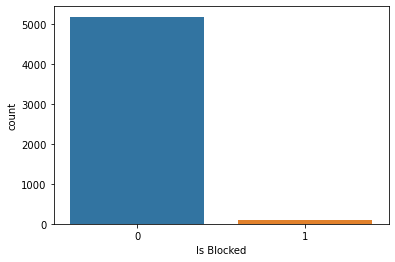

In [14]:
sns.countplot(customers['Is Blocked'])

The plot indicates a few customers have been blocked.

In [15]:
customers['Language'].value_counts() # There's only one platform therefore doesn't provide useful information - to delete

en    5272
Name: Language, dtype: int64

In [16]:
customers['Last Used Platform'].value_counts() # There's only one platform therefore doesn't provide useful information - to delete

WEB    5272
Name: Last Used Platform, dtype: int64

In [17]:
customers[customers['Number of Employees'] < 1] # Number of employees cannot be negative, will therefore be replaced with NAN

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Country
3267,4368868,WEB,0,2021-10-07T03:28:05.000Z,en,0,24,-2.0,Kenya


In [18]:
customers['Number of Employees'].replace(-2.0, np.nan, inplace=True)
customers.iloc[3267]

Customer ID                             4368868
Last Used Platform                          WEB
Is Blocked                                    0
Created At             2021-10-07T03:28:05.000Z
Language                                     en
Outstanding Amount                            0
Loyalty Points                               24
Number of Employees                         NaN
Country                                   Kenya
Name: 3267, dtype: object

In [19]:
customers.duplicated().sum() # No duplicates

0

In [20]:
customers.isnull().sum()

# I'll assume that the null values in employees refer to those with zero customers, hence will be replaced with zero

Customer ID               0
Last Used Platform        0
Is Blocked                0
Created At                0
Language                  0
Outstanding Amount        0
Loyalty Points            0
Number of Employees    1529
Country                   0
dtype: int64

In [21]:
# Clean up

customers['Created At'] = pd.to_datetime(customers['Created At']) 

customers.drop(columns = ['Language', 'Last Used Platform'], inplace=True)

customers['Number of Employees'] = customers['Number of Employees'].fillna(0) 

customers.sample(5)

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country
700,4505336,0,2021-10-30 19:28:08+00:00,0,0,0.0,Nigeria
481,4429802,0,2021-10-16 12:12:18+00:00,0,452,0.0,Nigeria
557,4470596,0,2021-10-23 19:14:44+00:00,0,50,5.0,Nigeria
3020,4197821,0,2021-09-01 09:37:20+00:00,0,21,1.0,Kenya
1772,4027974,0,2021-07-30 14:09:55+00:00,0,0,0.0,Kenya


In [22]:
# Creating a column to capture the time difference between today and the 'Created At' date column for each customer
customers['Tenure_Days'] = (pd.Timestamp.today(tz=pytz.UTC) - customers['Created At']).dt.days
customers.sample(5)

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country,Tenure_Days
4153,5161548,0,2022-02-11 08:36:35+00:00,0,0,0.0,Kenya,10
3560,4494995,0,2021-10-29 07:33:47+00:00,0,33,0.0,Kenya,115
2510,4100243,0,2021-08-13 08:09:25+00:00,0,11,3.0,Kenya,192
2538,4102902,0,2021-08-13 15:38:26+00:00,0,3,2.0,Kenya,191
1895,4052425,0,2021-08-04 06:07:41+00:00,0,3,2.0,Kenya,201


In [23]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Customer ID          5272 non-null   int64              
 1   Is Blocked           5272 non-null   int64              
 2   Created At           5272 non-null   datetime64[ns, UTC]
 3   Outstanding Amount   5272 non-null   int64              
 4   Loyalty Points       5272 non-null   int64              
 5   Number of Employees  5272 non-null   float64            
 6   Country              5272 non-null   object             
 7   Tenure_Days          5272 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 499.7+ KB


In [24]:
customers.describe(include='all')

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country,Tenure_Days
count,5.272000e+03,5272.000000,5272,5272.0,5272.000000,5.272000e+03,5272,5272.000000
unique,NaN,NaN,5271,NaN,NaN,NaN,2,NaN
top,NaN,NaN,2021-08-06 08:32:47+00:00,NaN,NaN,NaN,Kenya,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,4177,NaN
first,NaN,NaN,2021-03-15 17:13:19+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-17 13:07:11+00:00,NaN,NaN,NaN,NaN,NaN
mean,4.181560e+06,0.018399,NaN,0.0,110.023141,1.107874e+08,NaN,174.191199
std,3.213388e+05,0.134402,NaN,0.0,597.896925,9.343172e+08,NaN,59.849595
min,3.144837e+06,0.000000,NaN,0.0,0.000000,0.000000e+00,NaN,3.000000
25%,4.006893e+06,0.000000,NaN,0.0,0.000000,0.000000e+00,NaN,121.000000


### Deliveries clean-up

In [25]:
ke_deliv = pd.read_csv('kenya_deliveries.csv')
print(ke_deliv.shape)
ke_deliv.sample(5)

(44983, 36)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
30795,310211893,"YR-8727725,0",3.102119e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,3865,29.92,Kibanda Topup,28 Sep 2021 01:00:00 pm,29 Sep 2021 08:00:00 am,29 Sep 2021 07:50:23 am,Completed,-,0,-,-1.2947482,36.887698,NaN,-,Order_Details,1,KSh 1632.00,-,KSh 0.00,KSh 0.00,KSh 275.10,5226.9,CASH,-,-,-,NaN,NaN
37441,301157478,"YR-7948907,0",3.011575e+29,Default Team,Delivery,NaN,1091428,Derek Okongo,2531,5.9,Kibanda Topup,16 Aug 2021 04:58:54 pm,17 Aug 2021 09:00:00 am,17 Aug 2021 11:27:13 am,Completed,-,0,-,-1.2044605,36.917149,NaN,-,Order_Details,1,KSh 1580.00,-,-,-,-,-,-,-,-,-,NaN,NaN
12073,351410501,"YR-10415058,0",3.514105e+29,Default Team,Delivery,NaN,1251029,John Wacira,12426,33.98,Topup Mama,02 Jan 2022 09:23:25 pm,03 Jan 2022 08:00:00 am,03 Jan 2022 07:12:06 am,Completed,-,0,-,-1.2949916,36.886836,NaN,-,Order_Details,1,KSh 1990.00,-,-,-,-,-,-,-,0,0,NaN,NaN
37047,301367039,"YR-7969302,0",3.013670e+29,Default Team,Delivery,NaN,1051944,John Ouma,69407,204.75,Kibanda Topup,17 Aug 2021 08:51:46 pm,18 Aug 2021 09:00:00 am,18 Aug 2021 09:04:56 am,Completed,-,0,-,-1.1426202,36.966474,NaN,-,Order_Details,1,KSh 1879.00,-,-,-,-,-,-,-,-,-,NaN,NaN
38516,300308497,"YR-7852814,0",3.003085e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,11457,178.58,Kibanda Topup,11 Aug 2021 02:00:00 pm,12 Aug 2021 09:00:00 am,12 Aug 2021 11:45:05 am,Completed,-,0,-,-1.3,36.916700,NaN,-,Order_Details,1,KSh 250.00,-,-,-,-,-,-,-,-,-,NaN,NaN


In [26]:
ke_deliv.duplicated().sum()

188

In [27]:
ke_deliv['Order_ID'].duplicated().sum() # Assumption is that Orders should be unique therefore drop duplicates

24377

In [28]:
ke_deliv.drop_duplicates(subset=['Order_ID'], inplace=True)
ke_deliv.to_csv('ke_deliv.csv', index=False) #save to CSV to clean it up using excel a bit
ke_deliv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20606 entries, 0 to 44980
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                20606 non-null  int64  
 1   Order_ID               20606 non-null  object 
 2   Relationship           20606 non-null  float64
 3   Team_Name              20606 non-null  object 
 4   Task_Type              20606 non-null  object 
 5   Notes                  5623 non-null   object 
 6   Agent_ID               20606 non-null  object 
 7   Agent_Name             20606 non-null  object 
 8   Distance(m)            20606 non-null  object 
 9   Total_Time_Taken(min)  20606 non-null  object 
 10  Pick_up_From           20606 non-null  object 
 11  Start_Before           20606 non-null  object 
 12  Complete_Before        20606 non-null  object 
 13  Completion_Time        20606 non-null  object 
 14  Task_Status            20606 non-null  object 
 15  Re

In [29]:
ke_deliv_cleaned = pd.read_csv('ke_deliv_cleaned.csv')
ke_deliv_cleaned.sample(5)

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
17417,299230608,"YR-7736956,0",2.992306e+29,Default Team,Delivery,NaN,1051944,John Ouma,62924,166.27,Kibanda Topup,09 Aug 2021 04:00:00 pm,10 Aug 2021 11:00:00 am,10 Aug 2021 07:57:14 am,Completed,-,0,-,-1.1519018,36.948387,NaN,-,Order_Details,1,KSh 3719.00,-,KSh 0.00,KSh 0.00,KSh 300.00,3419,CASH,-,-,-,NaN,NaN
17105,299693360,"YR-7787840,0",2.996934e+29,Default Team,Delivery,NaN,1092860,Joshua Ndeleva,0,3,Kibanda Topup,07 Aug 2021 07:20:07 pm,08 Aug 2021 08:00:00 am,08 Aug 2021 07:19:46 am,Completed,-,0,-,-1.288503,36.877380,NaN,-,Order_Details,1,KSh 3719.00,-,-,-,-,-,-,-,-,-,NaN,NaN
9113,322867988,"YR-9257096,0",3.228680e+29,Default Team,Delivery,NaN,1026273,Herman Atsiaya,2950,20.07,Kibanda Topup,27 Oct 2021 07:18:22 pm,28 Oct 2021 08:00:00 am,28 Oct 2021 06:26:33 am,Completed,-,0,-,-1.2919541,36.813275,NaN,-,Order_Details,3,KSh 4920.00,-,KSh 0.00,KSh 0.00,KSh 30.00,4890,CASH,-,-,-,NaN,NaN
3623,348971990,"YR-10311923,0",3.489720e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,1182,6.15,Topup Mama,27 Dec 2021 09:07:24 pm,28 Dec 2021 09:00:00 am,28 Dec 2021 07:56:29 am,Completed,-,0,-,-1.2355864,36.872545,NaN,-,Order_Details,1,KSh 1750.00,-,-,-,-,-,-,-,0,0,NaN,NaN
14571,304315678,"YR-8278349,0",3.043157e+29,Default Team,Delivery,NaN,1051943,Peter Mwaura,26,0.13,Kibanda Topup,03 Sep 2021 07:00:00 pm,04 Sep 2021 08:00:00 am,04 Sep 2021 07:10:49 am,Completed,-,0,-,-1.2931526,36.790854,NaN,-,Order_Details,1,KSh 3699.00,-,-,-,-,-,-,-,-,-,NaN,NaN


In [30]:
ke_deliv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20606 entries, 0 to 20605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                20606 non-null  int64  
 1   Order_ID               20606 non-null  object 
 2   Relationship           20606 non-null  float64
 3   Team_Name              20606 non-null  object 
 4   Task_Type              20606 non-null  object 
 5   Notes                  5623 non-null   object 
 6   Agent_ID               20606 non-null  object 
 7   Agent_Name             20606 non-null  object 
 8   Distance(m)            20606 non-null  object 
 9   Total_Time_Taken(min)  20606 non-null  object 
 10  Pick_up_From           20606 non-null  object 
 11  Start_Before           20606 non-null  object 
 12  Complete_Before        20606 non-null  object 
 13  Completion_Time        20606 non-null  object 
 14  Task_Status            20606 non-null  object 
 15  Re

In [31]:
# ke_deliv_cleaned['Distance(m)'].astype(float)

In [32]:
# ProfileReport(ke_deliv)

In [33]:
# drop irrelevant columns (Agent_Name is dropped because it's missing in Nigeria Deliveries)

ke_deliv_cleaned.drop(columns = ['Agent_Name', 'Unnamed: 34', 'Unnamed: 35'], inplace=True)
print(ke_deliv_cleaned.shape)
ke_deliv_cleaned.sample(5)

(20606, 33)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
10385,318866911,"YR-9099012,0",3.188669e+29,Default Team,Delivery,Not earlier than 9am,1092535,277,0.97,Kibanda Topup,18 Oct 2021 04:02:19 pm,19 Oct 2021 10:00:00 am,19 Oct 2021 10:03:14 am,Completed,-,0,-,-1.2073563,36.917295,NaN,-,Order_Details,15,KSh 25950.00,Not earlier than 9am,KSh 0.00,KSh 0.00,KSh 0.00,25950,CASH,-,-,-
3462,350720032,"YR-10382316,0",3.507200e+29,Default Team,Delivery,Deliver in Monday morning by 7.00a.m,1051943,971,5.38,Topup Mama,02 Jan 2022 01:00:00 pm,03 Jan 2022 08:00:00 am,03 Jan 2022 06:46:33 am,Completed,-,0,-,-1.291999,36.787168,NaN,-,Order_Details,1,KSh 1740.00,-,-,-,-,-,-,-,0,0
2005,358659692,"YR-10746830,0",3.586597e+29,Default Team,Delivery,Deliver tomorrow morning by 9.00a.m,-,-,0,Topup Mama,20 Jan 2022 10:47:50 pm,21 Jan 2022 08:00:00 am,20 Jan 2022 10:57:31 pm,Cancelled,-,0,-,-1.277517,36.894435,NaN,-,Order_Details,2,KSh 8620.00,-,-,-,-,-,-,-,-,-
16908,300117359,"YR-7834982,0",3.001174e+29,Default Team,Delivery,Re order,1092714,14840,62.93,Kibanda Topup,11 Aug 2021 01:00:00 pm,12 Aug 2021 08:00:00 am,12 Aug 2021 07:14:00 am,Completed,-,0,-,-1.242261,36.912450,NaN,-,Order_Details,3,KSh 4587.00,-,-,-,-,-,-,-,-,-
20264,265759507,"YR-6532301,0",2.657595e+29,Default Team,Delivery,NaN,1015702,6621,22.68,Kibanda Topup,31 May 2021 09:44:24 pm,01 Jun 2021 08:00:00 am,01 Jun 2021 07:18:51 am,Completed,-,0,-,-1.2839985,36.899522,NaN,-,Order_Details,1,KSh 1799.00,-,KSh 0.00,KSh 0.00,KSh 4.00,1795,CASH,-,-,-


In [34]:
ke_deliv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20606 entries, 0 to 20605
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                20606 non-null  int64  
 1   Order_ID               20606 non-null  object 
 2   Relationship           20606 non-null  float64
 3   Team_Name              20606 non-null  object 
 4   Task_Type              20606 non-null  object 
 5   Notes                  5623 non-null   object 
 6   Agent_ID               20606 non-null  object 
 7   Distance(m)            20606 non-null  object 
 8   Total_Time_Taken(min)  20606 non-null  object 
 9   Pick_up_From           20606 non-null  object 
 10  Start_Before           20606 non-null  object 
 11  Complete_Before        20606 non-null  object 
 12  Completion_Time        20606 non-null  object 
 13  Task_Status            20606 non-null  object 
 14  Ref_Images             20606 non-null  object 
 15  Ra

In [35]:
ng_deliv = pd.read_csv('nigeria_deliveries.csv')
print(ng_deliv.shape)
ng_deliv.head()

(8019, 33)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
2,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
3,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
4,367999205,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,NaN,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-


In [36]:
ng_deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                8019 non-null   int64  
 1   Order_ID               8019 non-null   object 
 2   Relationship           8019 non-null   float64
 3   Team_Name              8019 non-null   object 
 4   Task_Type              8019 non-null   object 
 5   Notes                  7 non-null      object 
 6   Agent_ID               8019 non-null   object 
 7   Distance(m)            8019 non-null   object 
 8   Total_Time_Taken(min)  8019 non-null   object 
 9   Pick_up_From           8019 non-null   object 
 10  Start_Before           8019 non-null   object 
 11  Complete_Before        8019 non-null   object 
 12  Completion_Time        8019 non-null   object 
 13  Task_Status            8019 non-null   object 
 14  Ref_Images             8019 non-null   object 
 15  Rati

In [37]:
deliveries = pd.concat([ke_deliv_cleaned, ng_deliv])
print(deliveries.shape)
deliveries.sample(5)

(28625, 33)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
1116,356076266,"YR-10624634,0",3.560763e+29,Default Team,Delivery,NaN,1132867,6920,50.53,Topup Mama,14 Jan 2022 10:22:51 am,14 Jan 2022 03:00:00 pm,14 Jan 2022 01:25:43 pm,Completed,-,0,-,6.519477,3.371927,NaN,-,Order_Details,4,₦ 83400.00,-,₦ 0.00,₦ 0.00,₦ 0.00,83400,CASH,-,-,-
594,364964306,"YR-11121112,0",3.649643e+29,Default Team,Delivery,Kindly call 0792588844 for effective delivery ...,1143831,4553,51.32,Topup Mama,09 Feb 2022 09:27:34 pm,10 Feb 2022 08:00:00 am,10 Feb 2022 09:23:32 am,Completed,-,0,-,-1.225803,36.843939,NaN,-,Order_Details,10,KSh 43200.00,-,-,-,-,-,-,-,0,0
19990,271614450,"YR-6703550,0",2.716145e+29,Default Team,Delivery,To be delivered on Wednesday next week,1015702,3719,52.93,Kibanda Topup,15 Jun 2021 01:00:00 pm,16 Jun 2021 08:00:00 am,16 Jun 2021 08:31:26 am,Failed,-,0,-,-1.2733009,36.897591,NaN,-,Order_Details,2,KSh 2998.00,To be delivered on Wednesday next week,KSh 0.00,KSh 0.00,KSh 0.00,2998,CASH,-,-,-
19315,287673187,"YR-7146117,0",2.876732e+29,Default Team,Delivery,NaN,1015707,27111,93.3,Kibanda Topup,03 Jul 2021 08:21:30 pm,04 Jul 2021 08:00:00 am,04 Jul 2021 07:39:42 am,Completed,-,0,-,-1.1712123,36.972574,NaN,-,Order_Details,1,KSh 35.00,-,-,-,-,-,-,-,-,-
1959,359042147,"YR-10761843,0",3.590421e+29,Default Team,Delivery,NaN,1051943,-,16.07,Topup Mama,21 Jan 2022 07:08:09 pm,22 Jan 2022 08:00:00 am,22 Jan 2022 07:37:07 am,Completed,-,0,-,-1.299911,36.786330,NaN,-,Order_Details,1,KSh 120.00,-,-,-,-,-,-,-,0,0


In [38]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28625 entries, 0 to 8018
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                28625 non-null  int64  
 1   Order_ID               28625 non-null  object 
 2   Relationship           28625 non-null  float64
 3   Team_Name              28625 non-null  object 
 4   Task_Type              28625 non-null  object 
 5   Notes                  5630 non-null   object 
 6   Agent_ID               28625 non-null  object 
 7   Distance(m)            28625 non-null  object 
 8   Total_Time_Taken(min)  28625 non-null  object 
 9   Pick_up_From           28625 non-null  object 
 10  Start_Before           28625 non-null  object 
 11  Complete_Before        28625 non-null  object 
 12  Completion_Time        28625 non-null  object 
 13  Task_Status            28625 non-null  object 
 14  Ref_Images             28625 non-null  object 
 15  Rat

In [39]:
deliveries['Order_ID'].unique()

array(['YR-11265216,0', 'YR-11265175,0', 'YR-11265015,0', ...,
       'YR-7740083,0', 'YR-7739676,0', 'YR-7738989,0'], dtype=object)

In [40]:
deliveries['Order_ID'] = deliveries['Order_ID'].str[3:-2]
deliveries['Order_ID'] = deliveries['Order_ID'].astype(str)
deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368110390,11265216,3.681104e+29,Default Team,Delivery,NaN,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-
1,368109621,11265175,3.681096e+29,Default Team,Delivery,NaN,-,-,-,Topup Mama,17 Feb 2022 04:46:43 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.25,36.883330,NaN,-,Order_Details,10,KSh 19900.00,-,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-
2,368105817,11265015,3.681058e+29,Default Team,Delivery,NaN,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-
3,368098308,11264651,3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-
4,368094329,11264496,3.680943e+29,Default Team,Delivery,Deliver on Saturday morning at 10.00a.m,-,-,-,Topup Mama,18 Feb 2022 03:00:00 pm,19 Feb 2022 10:00:00 am,-,Unassigned,-,0,-,-1.25900995,36.790754,NaN,-,Order_Details,1,KSh 4400.00,Deliver on Saturday morning at 10.00a.m,KSh 0.00,KSh 0.00,KSh 0.00,4400,CASH,-,-,-


In [41]:
deliveries.tail()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
8014,299262559,7740083,2.992626e+29,Default Team,Delivery,NaN,-,-,0,Kibanda Topup Nigeria,05 Aug 2021 11:13:26 am,05 Aug 2021 01:30:00 pm,05 Aug 2021 11:34:24 am,Cancelled,-,0,-,6.548535,3.327299,NaN,-,Order_Details,5,₦ 10000.00,-,₦ 0.00,₦ 0.00,₦ 0.00,10000,CASH,-,-,-
8015,299259587,7739676,2.992596e+29,Default Team,Delivery,NaN,-,-,3103.05,Kibanda Topup Nigeria,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,07 Aug 2021 07:10:34 pm,Cancelled,-,0,-,-1.292066,36.821946,NaN,-,Order_Details,1,₦ 17000.00,-,₦ 0.00,₦ 0.00,₦ 0.00,17000,CASH,-,-,-
8016,299259586,7739676,2.992596e+29,Default Team,Pick-up,NaN,-,-,0,Kibanda Topup Nigeria,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,07 Aug 2021 04:31:10 pm,Cancelled,-,0,-,47.60219,-122.333490,NaN,-,Order_Details,1,₦ 17000.00,-,-,-,₦ 0.00,17000,CASH,-,-,-
8017,299251273,7738989,2.992513e+29,Default Team,Delivery,NaN,-,-,0,Kibanda Topup Nigeria,06 Aug 2021 07:30:00 am,06 Aug 2021 08:00:00 am,05 Aug 2021 03:34:52 pm,Cancelled,-,0,-,6.425065,3.420103,NaN,-,Order_Details,5,₦ 10000.00,-,₦ 0.00,₦ 0.00,₦ 0.00,10000,CASH,-,-,-
8018,299251272,7738989,2.992513e+29,Default Team,Pick-up,NaN,-,-,0,Kibanda Topup Nigeria,06 Aug 2021 07:30:00 am,06 Aug 2021 08:00:00 am,05 Aug 2021 03:34:52 pm,Cancelled,-,0,-,47.60219,-122.333490,NaN,-,Order_Details,5,₦ 10000.00,-,-,-,₦ 0.00,10000,CASH,-,-,-


### Orders Clean Up

In [42]:
ke_orders = pd.read_csv('kenya_orders.csv')
ke_orders.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-


In [43]:
ke_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12242 entries, 0 to 12241
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  12242 non-null  int64  
 1   Order Status              12242 non-null  object 
 2   Category Name             12236 non-null  object 
 3   SKU                       12239 non-null  object 
 4   Customization Group       0 non-null      float64
 5   Customization Option      0 non-null      float64
 6   Quantity                  12242 non-null  int64  
 7   Unit Price                12242 non-null  int64  
 8   Cost Price                12242 non-null  object 
 9   Total Cost Price          12242 non-null  object 
 10  Total Price               12242 non-null  int64  
 11  Order Total               12242 non-null  float64
 12  Sub Total                 12242 non-null  int64  
 13  Tax                       12242 non-null  object 
 14  Delive

In [44]:
# dropping irrelevant columns
ke_orders.drop(columns = ['Customization Group', 'Customization Option', 'Transaction Status',
                          'Promo Code', 'Ratings', 'Description', 'Reviews', 'Merchant Earning',
                          'Commission Amount', 'Commission Payout Status', 'Cancellation Reason'], inplace = True)
# Creating a new column to identify the country of the customer
ke_orders['Country'] = 'Kenya'

ke_orders.head()

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Country
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,-,50,-,0,-,-,Kenya
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya


In [45]:
ke_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12242 entries, 0 to 12241
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 12242 non-null  int64  
 1   Order Status             12242 non-null  object 
 2   Category Name            12236 non-null  object 
 3   SKU                      12239 non-null  object 
 4   Quantity                 12242 non-null  int64  
 5   Unit Price               12242 non-null  int64  
 6   Cost Price               12242 non-null  object 
 7   Total Cost Price         12242 non-null  object 
 8   Total Price              12242 non-null  int64  
 9   Order Total              12242 non-null  float64
 10  Sub Total                12242 non-null  int64  
 11  Tax                      12242 non-null  object 
 12  Delivery Charge          12242 non-null  object 
 13  Tip                      12242 non-null  object 
 14  Discount              

In [46]:
ng_orders = pd.read_csv('nigeria_orders.csv')
ng_orders.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11262518,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
1,11262518,ORDERED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
3,11261796,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
4,11261341,ORDERED,Spreads,KNSP2001,NaN,NaN,6,325,300,1800,1950,87550.0,87550,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,5156201,1048159,Topup Mama,-,NaN,11998.28,2022-02-17T10:32:23.000Z,2022-02-17T10:33:11.000Z,2022-02-17T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-


In [47]:
ng_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  1429 non-null   int64  
 1   Order Status              1429 non-null   object 
 2   Category Name             1429 non-null   object 
 3   SKU                       1429 non-null   object 
 4   Customization Group       0 non-null      float64
 5   Customization Option      0 non-null      float64
 6   Quantity                  1429 non-null   int64  
 7   Unit Price                1429 non-null   int64  
 8   Cost Price                1429 non-null   int64  
 9   Total Cost Price          1429 non-null   int64  
 10  Total Price               1429 non-null   int64  
 11  Order Total               1429 non-null   float64
 12  Sub Total                 1429 non-null   int64  
 13  Tax                       1429 non-null   object 
 14  Delivery

In [48]:
#Dropping irrelevant columns
ng_orders.drop(columns = ['Customization Group', 'Customization Option', 'Transaction Status', 'Promo Code',
                         'Description', 'Ratings', 'Reviews', 'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
                         'Cancellation Reason'], inplace = True)
# Creating a new column to identify the country of the customer
ng_orders['Country'] = 'Nigeria'

ng_orders.head()

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Country
0,11262518,ORDERED,Flour & Sugar,KNFS0001,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,4645484,1048159,Topup Mama,-,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,0,-,-,0,-,-,Nigeria
1,11262518,ORDERED,Spreads,KNSP2001,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,4645484,1048159,Topup Mama,-,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,0,-,-,0,-,-,Nigeria
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,4420776,1048159,Topup Mama,-,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,0,-,-,0,-,-,Nigeria
3,11261796,DISPATCHED,Spreads,KNSP2001,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,4420776,1048159,Topup Mama,-,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,0,-,-,0,-,-,Nigeria
4,11261341,ORDERED,Spreads,KNSP2001,6,325,300,1800,1950,87550.0,87550,-,-,-,-,0,CASH,-,-,0,₦,5156201,1048159,Topup Mama,-,11998.28,2022-02-17T10:32:23.000Z,2022-02-17T10:33:11.000Z,2022-02-17T11:00:00.000Z,0,-,-,0,-,-,Nigeria


In [49]:
ng_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1429 non-null   int64  
 1   Order Status             1429 non-null   object 
 2   Category Name            1429 non-null   object 
 3   SKU                      1429 non-null   object 
 4   Quantity                 1429 non-null   int64  
 5   Unit Price               1429 non-null   int64  
 6   Cost Price               1429 non-null   int64  
 7   Total Cost Price         1429 non-null   int64  
 8   Total Price              1429 non-null   int64  
 9   Order Total              1429 non-null   float64
 10  Sub Total                1429 non-null   int64  
 11  Tax                      1429 non-null   object 
 12  Delivery Charge          1429 non-null   object 
 13  Tip                      1429 non-null   object 
 14  Discount                

In [50]:
#Joining the orders data set in Kenya & Nigeria
orders = pd.concat([ke_orders, ng_orders])
orders.rename({'Order ID' : 'Order_ID'}, axis=1, inplace=True)
orders['Order_ID'] = orders['Order_ID'].astype(str)
print(orders.shape)
orders.sample(5)

(13671, 37)


,Order_ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Country
6017,10875855,COMPLETED,Packaging,KKPT0620,2,70,61,122,140,7212.42,7071,-,-,-,-,0,Pay Later,-,-,0,KSh,4480666,893555,Topup Mama,"Kilimani, Nairobi, Kenya",11.11,2022-01-27T18:39:03.000Z,2022-01-27T18:39:53.000Z,2022-01-28T08:00:00.000Z,0,-,-,70,0,-,-,Kenya
7438,10804584,CANCELLED,NaN,KKBE0117,1,199,179.5,179.5,199,23784.00,23784,-,-,-,-,0,CASH,-,-,0,KSh,4156953,893555,Topup Mama,"Kilimani, Nairobi, Kenya",7.11,2022-01-23T18:59:35.000Z,2022-01-23T19:00:24.000Z,2022-01-24T08:00:00.000Z,0,-,-,-,0,-,-,Kenya
7120,10809022,COMPLETED,Salt & Seasoning,KKSS0002,1,61,58,58,61,2240.00,2365,-,-,-,-,0,CASH,-,-,0,KSh,3671732,893555,Topup Mama,"Kilimani, Nairobi, Kenya",11.43,2022-01-23T23:40:48.000Z,2022-01-23T23:41:33.000Z,2022-01-24T08:00:00.000Z,0,-,125,23,0,-,-,Kenya
11775,10442999,COMPLETED,Salt & Seasoning,KKSS0002,1,61,58,58,61,12961.00,12961,-,-,-,-,0,CASH,-,-,0,KSh,4510535,893555,Topup Mama,"Kilimani, Nairobi, Kenya",5.14,2022-01-04T16:08:22.000Z,2022-01-04T16:08:11.000Z,2022-01-05T08:00:00.000Z,0,-,-,129,0,-,-,Kenya
11889,10430383,COMPLETED,Cooking Fat & Oil,KKCO0620,1,4296,4230,4230,4296,9076.00,9076,-,-,-,-,0,CASH,-,-,0,KSh,3700182,893555,Topup Mama,"Kilimani, Nairobi, Kenya",5.24,2022-01-03T19:52:35.000Z,2022-01-03T19:52:26.000Z,2022-01-04T08:00:00.000Z,0,-,-,90,0,-,-,Kenya


In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13671 entries, 0 to 1428
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_ID                 13671 non-null  object 
 1   Order Status             13671 non-null  object 
 2   Category Name            13665 non-null  object 
 3   SKU                      13668 non-null  object 
 4   Quantity                 13671 non-null  int64  
 5   Unit Price               13671 non-null  int64  
 6   Cost Price               13671 non-null  object 
 7   Total Cost Price         13671 non-null  object 
 8   Total Price              13671 non-null  int64  
 9   Order Total              13671 non-null  float64
 10  Sub Total                13671 non-null  int64  
 11  Tax                      13671 non-null  object 
 12  Delivery Charge          13671 non-null  object 
 13  Tip                      13671 non-null  object 
 14  Discount               

In [52]:
orders['Order Status'].value_counts()

COMPLETED     12554
CANCELLED       978
ORDERED         134
DISPATCHED        5
Name: Order Status, dtype: int64

<AxesSubplot:xlabel='Order Status', ylabel='count'>

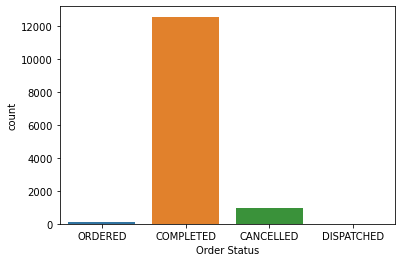

In [53]:
sns.countplot(orders['Order Status'])

Mosts of the orders have been delivered as compared to what has been cancelled.

In [54]:
#Joining the three datasets into one dataframe
df = pd.merge(orders, deliveries, on='Order_ID')
df1 = pd.merge(df, customers, on='Customer ID')
df1

,Order_ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Country_x,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country_y,Tenure_Days
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,-,50,-,0,-,-,Kenya,368105817,3.681058e+29,Default Team,Delivery,NaN,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
1,11213888,COMPLETED,Flour & Sugar,KKFS02350,1,3400,3200,3200,3400,3350.0,3400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-14T18:12:21.000Z,2022-02-15T14:00:00.000Z,2022-02-16T09:00:00.000Z,0,-,50,34,0,-,-,Kenya,366897156,3.668972e+29,Default Team,Delivery,NaN,1251029,17140,79.57,Topup Mama,15 Feb 2022 02:00:00 pm,16 Feb 2022 09:00:00 am,16 Feb 2022 06:42:32 am,Completed,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 3400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,3350,CASH,-,0,0,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
2,10606303,CANCELLED,Cooking Fat & Oil,KKCO0487,1,4310,4200,4200,4310,4365.0,4365,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,2022-01-13T13:00:00.000Z,2022-01-14T08:00:00.000Z,0,-,-,-,0,-,-,Kenya,355656455,3.556565e+29,Default Team,Delivery,NaN,-,-,0,Topup Mama,13 Jan 2022 01:00:00 pm,14 Jan 2022 08:00:00 am,13 Jan 2022 06:45:38 pm,Cancelled,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
3,10606303,CANCELLED,Cleaning & Hygiene,KKPT1201,1,55,48.33,48.33,55,4365.0,4365,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,2022-01-13T13:00:00.000Z,2022-01-14T08:00:00.000Z,0,-,-,-,0,-,-,Kenya,355656455,3.556565e+29,Default Team,Delivery,NaN,-,-,0,Topup Mama,13 Jan 2022 01:00:00 pm,14 Jan 2022 08:00:00 am,13 Jan 2022 06:45:38 pm,Cancelled,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
4,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya,368098308,3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-,0,2021-11-09 15:40:46+00:00,0,145,0.0,Kenya,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [55]:
df1.shape

(15764, 76)

In [56]:
df1.head()

,Order_ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Country_x,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country_y,Tenure_Days
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,-,50,-,0,-,-,Kenya,368105817,3.681058e+29,Default Team,Delivery,NaN,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
1,11213888,COMPLETED,Flour & Sugar,KKFS02350,1,3400,3200,3200,3400,3350.0,3400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-14T18:12:21.000Z,2022-02-15T14:00:00.000Z,2022-02-16T09:00:00.000Z,0,-,50,34,0,-,-,Kenya,366897156,3.668972e+29,Default Team,Delivery,NaN,1251029,17140,79.57,Topup Mama,15 Feb 2022 02:00:00 pm,16 Feb 2022 09:00:00 am,16 Feb 2022 06:42:32 am,Completed,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 3400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,3350,CASH,-,0,0,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
2,10606303,CANCELLED,Cooking Fat & Oil,KKCO0487,1,4310,4200,4200,4310,4365.0,4365,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,2022-01-13T13:00:00.000Z,2022-01-14T08:00:00.000Z,0,-,-,-,0,-,-,Kenya,355656455,3.556565e+29,Default Team,Delivery,NaN,-,-,0,Topup Mama,13 Jan 2022 01:00:00 pm,14 Jan 2022 08:00:00 am,13 Jan 2022 06:45:38 pm,Cancelled,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
3,10606303,CANCELLED,Cleaning & Hygiene,KKPT1201,1,55,48.33,48.33,55,4365.0,4365,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,2022-01-13T13:00:00.000Z,2022-01-14T08:00:00.000Z,0,-,-,-,0,-,-,Kenya,355656455,3.556565e+29,Default Team,Delivery,NaN,-,-,0,Topup Mama,13 Jan 2022 01:00:00 pm,14 Jan 2022 08:00:00 am,13 Jan 2022 06:45:38 pm,Cancelled,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,-,-,-,0,2021-06-11 15:42:57+00:00,0,43,3.0,Kenya,254
4,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-,Kenya,368098308,3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-,0,2021-11-09 15:40:46+00:00,0,145,0.0,Kenya,103


In [57]:
df1.isnull().sum()

Order_ID               0
Order Status           0
Category Name          6
SKU                    3
Quantity               0
                      ..
Outstanding Amount     0
Loyalty Points         0
Number of Employees    0
Country_y              0
Tenure_Days            0
Length: 76, dtype: int64

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15764 entries, 0 to 15763
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Order_ID                 15764 non-null  object             
 1   Order Status             15764 non-null  object             
 2   Category Name            15758 non-null  object             
 3   SKU                      15761 non-null  object             
 4   Quantity                 15764 non-null  int64              
 5   Unit Price               15764 non-null  int64              
 6   Cost Price               15764 non-null  object             
 7   Total Cost Price         15764 non-null  object             
 8   Total Price              15764 non-null  int64              
 9   Order Total              15764 non-null  float64            
 10  Sub Total                15764 non-null  int64              
 11  Tax                      157

In [59]:
#Dropping irrelevant columns with less data
df1.drop(columns = ['Notes', 'Tags'], inplace = True)

In [60]:
df1.shape

(15764, 74)

In [61]:
#Pandas Profiling to help understand and get quick Analysis about our newly created data
#In this case we will use minimal because our dataset is too large
profile = ProfileReport(df1, minimal=True)

In [62]:
profile

Summarize dataset:   0%|          | 0/82 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
#Pandas Profiling has also enabled us get to also drop columns that have no big impact on the dataset
#This helps us get rid of unnecessary data
#We now deal with the issue of High Cardinality - we one of the variables between the two to reduce having a large dataset
df_final = df1.drop(columns = ['SKU', 'Pickup Time', 'Delivery Time', 'Consumed Loyalty Points', 'Total_Time_Taken(min)','Start_Before', 'Complete_Before', 
                               'Special_Instructions','Discount_y', ],axis = 1)

In [64]:
df_final.shape

(15764, 65)

In [65]:
df_final.columns

Index(['Order_ID', 'Order Status', 'Category Name', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
       'Sub Total', 'Tax', 'Delivery Charge', 'Tip_x', 'Discount_x',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol', 'Customer ID',
       'Merchant ID', 'Store Name', 'Pickup Address', 'Distance (in km)',
       'Order Time', 'Order Preparation Time', 'Debt Amount',
       'Redeemed Loyalty Points', 'Flat Discount', 'Checkout Template Name',
       'Checkout Template Value', 'Country_x', 'Task_ID', 'Relationship',
       'Team_Name', 'Task_Type', 'Agent_ID', 'Distance(m)', 'Pick_up_From',
       'Completion_Time', 'Task_Status', 'Ref_Images', 'Rating', 'Review',
       'Latitude', 'Longitude', 'Promo_Applied', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT', 'Tip_y', 'Delivery_Charges',
       'Subtotal', 'Payment_Type', 'Task_Category'

In [66]:
#We now reject the columns that have no significant effect on the analysis and machine learning bit of it
df_data = df_final.drop(columns = ['Cost Price', 'Total Cost Price', 'Tax', 'Delivery Charge',
                                  'Tip_x', 'Discount_x', 'Discount_x', 'Remaining Balance', 'Additional Charge', 'Taxable Amount',
                                  'Transaction ID', 'Store Name', 'Order Preparation Time', 'Debt Amount', 
                                  'Flat Discount', 'Checkout Template Name', 'Checkout Template Value', 'Team_Name', 'Task_Type',
                                  'Rating', 'Latitude', 'Promo_Applied', 'Task_Category', 'Is Blocked', 'Outstanding Amount',
                                  ],axis = 1)

In [67]:
df_data.shape

(15764, 41)

In [68]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15764 entries, 0 to 15763
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Order_ID                 15764 non-null  object             
 1   Order Status             15764 non-null  object             
 2   Category Name            15758 non-null  object             
 3   Quantity                 15764 non-null  int64              
 4   Unit Price               15764 non-null  int64              
 5   Total Price              15764 non-null  int64              
 6   Order Total              15764 non-null  float64            
 7   Sub Total                15764 non-null  int64              
 8   Payment Method           15764 non-null  object             
 9   Currency Symbol          15764 non-null  object             
 10  Customer ID              15764 non-null  int64              
 11  Merchant ID              157

In [69]:
df_data.head()

,Order_ID,Order Status,Category Name,Quantity,Unit Price,Total Price,Order Total,Sub Total,Payment Method,Currency Symbol,Customer ID,Merchant ID,Pickup Address,Distance (in km),Order Time,Redeemed Loyalty Points,Country_x,Task_ID,Relationship,Agent_ID,Distance(m),Pick_up_From,Completion_Time,Task_Status,Ref_Images,Review,Longitude,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Tip_y,Delivery_Charges,Subtotal,Payment_Type,Earning,Pricing,Created At,Loyalty Points,Number of Employees,Country_y,Tenure_Days
0,11265015,ORDERED,Cooking Fat & Oil,1,4400,4400,4350.0,4400,CASH,KSh,3755460,893555,"Kilimani, Nairobi, Kenya",10.90,2022-02-17T16:36:27.000Z,50,Kenya,368105817,3.681058e+29,-,-,Topup Mama,-,Unassigned,-,-,36.887286,Order_Details,1,KSh 4400.00,KSh 0.00,KSh 0.00,4350,CASH,-,-,2021-06-11 15:42:57+00:00,43,3.0,Kenya,254
1,11213888,COMPLETED,Flour & Sugar,1,3400,3400,3350.0,3400,CASH,KSh,3755460,893555,"Kilimani, Nairobi, Kenya",10.90,2022-02-14T18:12:21.000Z,50,Kenya,366897156,3.668972e+29,1251029,17140,Topup Mama,16 Feb 2022 06:42:32 am,Completed,-,-,36.887286,Order_Details,1,KSh 3400.00,KSh 0.00,KSh 0.00,3350,CASH,0,0,2021-06-11 15:42:57+00:00,43,3.0,Kenya,254
2,10606303,CANCELLED,Cooking Fat & Oil,1,4310,4310,4365.0,4365,CASH,KSh,3755460,893555,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,-,Kenya,355656455,3.556565e+29,-,-,Topup Mama,13 Jan 2022 06:45:38 pm,Cancelled,-,-,36.887286,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,2021-06-11 15:42:57+00:00,43,3.0,Kenya,254
3,10606303,CANCELLED,Cleaning & Hygiene,1,55,55,4365.0,4365,CASH,KSh,3755460,893555,"Kilimani, Nairobi, Kenya",10.90,2022-01-13T12:14:30.000Z,-,Kenya,355656455,3.556565e+29,-,-,Topup Mama,13 Jan 2022 06:45:38 pm,Cancelled,-,-,36.887286,Order_Details,1,KSh 4310.00,-,-,-,-,-,-,2021-06-11 15:42:57+00:00,43,3.0,Kenya,254
4,11264651,ORDERED,Cleaning & Hygiene,1,180,180,7255.0,7255,CASH,KSh,4541187,893555,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,-,Kenya,368098308,3.680983e+29,-,-,Topup Mama,-,Unassigned,-,-,36.743347,Order_Details,1,KSh 180.00,-,-,-,-,-,-,2021-11-09 15:40:46+00:00,145,0.0,Kenya,103


In [70]:
df_data.dtypes

Order_ID                                object
Order Status                            object
Category Name                           object
Quantity                                 int64
Unit Price                               int64
Total Price                              int64
Order Total                            float64
Sub Total                                int64
Payment Method                          object
Currency Symbol                         object
Customer ID                              int64
Merchant ID                              int64
Pickup Address                          object
Distance (in km)                       float64
Order Time                              object
Redeemed Loyalty Points                 object
Country_x                               object
Task_ID                                  int64
Relationship                           float64
Agent_ID                                object
Distance(m)                             object
Pick_up_From 

In [71]:
df_data['Order_ID'] = df_data['Order_ID'].astype(int)

In [72]:
df_data['Order Time'] = pd.to_datetime(df_data['Order Time'])

In [73]:
df_data['Redeemed Loyalty Points'] = df_data['Redeemed Loyalty Points'].astype(int, errors = 'ignore')

In [74]:
df_data['Agent_ID'] = df_data['Agent_ID'].astype(int, errors = 'ignore')

In [75]:
df_data['Distance(m)'] = df_data['Distance(m)'].astype(int, errors = 'ignore')

In [76]:
#(pd.Timestamp.today(tz=pytz.UTC) - customers['Created At']).dt.days
df_data['Completion_Time'] = pd.to_datetime(df_data['Completion_Time'], errors= 'ignore')

In [77]:
df_data['Task_Details_QTY'] = df_data['Task_Details_QTY'].astype(int, errors = 'ignore')

In [78]:
df_data['Task_Details_AMOUNT'] = df_data['Task_Details_AMOUNT'].str[3:-1].astype(float, errors = 'ignore')

In [79]:
df_data['Tip_y'] = df_data['Tip_y'].str[3:-1].astype(float, errors = 'ignore')

In [80]:
df_data['Delivery_Charges'] = df_data['Delivery_Charges'].astype(float, errors = 'ignore')

In [81]:
df_data['Subtotal'] = df_data['Subtotal'].str.replace('-', ' ').astype(int, errors = 'ignore')

In [82]:
df_data['Earning'] = df_data['Earning'].astype(int, errors = 'ignore')

In [83]:
df_data['Pricing'] = df_data['Pricing'].str.replace('-' , ' ').astype(int, errors = 'ignore')

In [84]:
df_data['Pricing'].dtypes

dtype('O')

In [85]:
df_data['Number of Employees'] = df_data['Number of Employees'].astype(int)

In [86]:
df_data.dtypes

Order_ID                                 int32
Order Status                            object
Category Name                           object
Quantity                                 int64
Unit Price                               int64
Total Price                              int64
Order Total                            float64
Sub Total                                int64
Payment Method                          object
Currency Symbol                         object
Customer ID                              int64
Merchant ID                              int64
Pickup Address                          object
Distance (in km)                       float64
Order Time                 datetime64[ns, UTC]
Redeemed Loyalty Points                 object
Country_x                               object
Task_ID                                  int64
Relationship                           float64
Agent_ID                                object
Distance(m)                             object
Pick_up_From 

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15764 entries, 0 to 15763
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Order_ID                 15764 non-null  object             
 1   Order Status             15764 non-null  object             
 2   Category Name            15758 non-null  object             
 3   Quantity                 15764 non-null  int64              
 4   Unit Price               15764 non-null  int64              
 5   Cost Price               15764 non-null  object             
 6   Total Cost Price         15764 non-null  object             
 7   Total Price              15764 non-null  int64              
 8   Order Total              15764 non-null  float64            
 9   Sub Total                15764 non-null  int64              
 10  Tax                      15764 non-null  object             
 11  Delivery Charge          157

In [88]:
#drop Ref_Images, Review

<AxesSubplot:xlabel='Number of Employees', ylabel='count'>

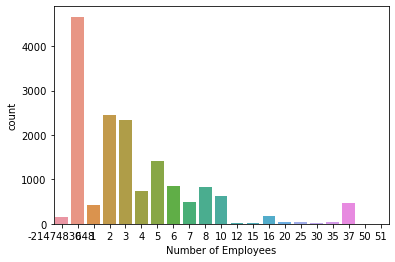

In [89]:
#Number of Number of Employees
sns.countplot(df_data['Number of Employees'])
#Mos employers seem to have a total of 2500 employees

In [90]:
df_data.groupby(by = 'Created At')['Sub Total'].nlargest(5)

Created At                     
2021-04-21 07:15:56+00:00  9406     6516
                           9407     6516
                           9408     6516
                           9409     4320
2021-04-21 10:23:50+00:00  2806     7961
                                   ...  
2022-02-17 09:51:36+00:00  173     11990
                           174     11990
                           175     11990
                           176     11990
2022-02-17 13:07:11+00:00  13       4400
Name: Sub Total, Length: 2842, dtype: int64

In [91]:
df_data.groupby(by = 'Category Name')['Sub Total'].nlargest(5)

Category Name        
Beer & Bitters  15713    13100
                15714    13100
                15715    13100
                15716    13100
                15717    13100
                         ...  
Vegetables      15199    45300
                15200    45300
                15201    45300
Wine            14219    39200
                14220    39200
Name: Sub Total, Length: 67, dtype: int64

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

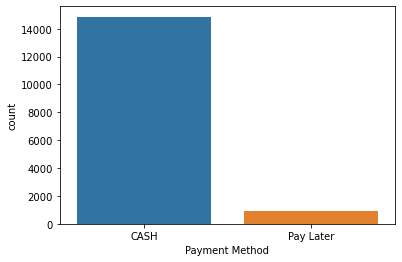

In [92]:
sns.countplot(df['Payment Method'])
#Most of the customers here paid via cash

<AxesSubplot:xlabel='Pick_up_From', ylabel='count'>

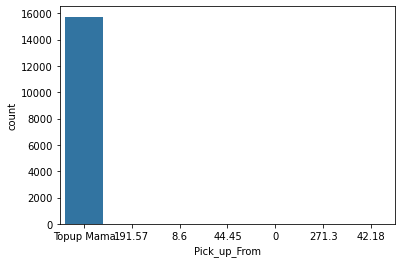

In [93]:
sns.countplot(df['Pick_up_From'])
#Most of the clients pick up the Top Up mama location

## Machine Learning

#### Customer Retention

This refers to a company's ability to turn customers into prevent buyers and prevent them from switching to a competitor

In [94]:
#We will use the Customers Data in this case
customers.head()

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Country,Tenure_Days
0,3144837,0,2021-03-15 17:13:19+00:00,0,0,0.0,Kenya,342
1,3174590,0,2021-03-20 14:15:11+00:00,0,0,0.0,Kenya,337
2,3181998,0,2021-03-21 15:36:51+00:00,0,0,0.0,Kenya,336
3,3191244,0,2021-03-23 08:54:00+00:00,0,367,0.0,Kenya,335
4,3274222,0,2021-04-06 13:52:39+00:00,0,0,0.0,Kenya,320


In [95]:
#Our predictor column "Is Blocked is unbalanced as evident in the code below"
customers['Is Blocked'].value_counts()

0    5175
1      97
Name: Is Blocked, dtype: int64

In [96]:
#Implying 0- Not blocked & 1- Blocked 
#We definine the X variables and Y variables
x = customers
y = customers['Is Blocked']

In [97]:
#We drop the unrequired column for macine learning which is the Customer ID
x.drop(columns = ['Customer ID', 'Created At'], inplace=True)
#x.drop('Customer ID', 'Created At', inplace = True)
x.columns

Index(['Is Blocked', 'Outstanding Amount', 'Loyalty Points',
       'Number of Employees', 'Country', 'Tenure_Days'],
      dtype='object')

In [98]:
#Drop the predictor variable as well
x.drop('Is Blocked', axis = 1, inplace = True)
x.columns

Index(['Outstanding Amount', 'Loyalty Points', 'Number of Employees',
       'Country', 'Tenure_Days'],
      dtype='object')

In [99]:
#Label Encoding
#This will take place on the Country Column as Python does not understand textual data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
x.loc[:,['Country']] = \
x.loc[:,['Country']].apply(enc.fit_transform)
x.head()

,Outstanding Amount,Loyalty Points,Number of Employees,Country,Tenure_Days
0,0,0,0.0,0,342
1,0,0,0.0,0,337
2,0,0,0.0,0,336
3,0,367,0.0,0,335
4,0,0,0.0,0,320


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [103]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [105]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

In [106]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9848293299620733


In [107]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Is Blocked,,
0,1556,4
1,20,2


In [108]:
#Oversampling technique
smote = SMOTE()

In [109]:
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'), y_train)

In [110]:
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({0: 3615, 1: 75})
After SMOTE: Counter({0: 3615, 1: 3615})


In [111]:
clf.fit(x_train_smote, y_train_smote)
y_predict = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_predict) * 100)
pd.crosstab(y_test, y_predict)

96.39696586599241


col_0,0,1
Is Blocked,,
0,1518,42
1,15,7


Using the Random Forest Classifier : Our model is 96.52% in predicting Customer Retention

In [112]:
#Creating a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [113]:
dtc = DecisionTreeClassifier()

In [114]:
dtc.fit(x_train_smote, y_train_smote)
y_predict = dtc.predict(x_test)
print(metrics.accuracy_score(y_test, y_predict) * 100)
pd.crosstab(y_test, y_predict)

95.38558786346397


col_0,0,1
Is Blocked,,
0,1502,58
1,15,7


Using the Decision Tree Classifier : Our model is 95.006% in predicting Customer Retention

Random Forest Classifier plays a better role with a better accuracy than Decision Tree Classifier

### Classifying Customers

Text(0.5, 1.0, 'Boxplot of Outstanding Amount')

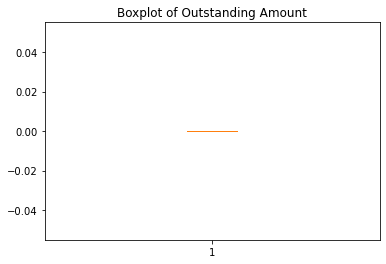

In [115]:
#lets see if our dataset contains any outliers using a boxplot
plt.boxplot(customers['Outstanding Amount'])
plt.title('Boxplot of Outstanding Amount')

In [116]:
#In this instance we use Kmeans for Classification of customers
#I will use the subtotal in relation to the relationship
from sklearn.cluster import KMeans

Text(0, 0.5, 'Loyalty Points')

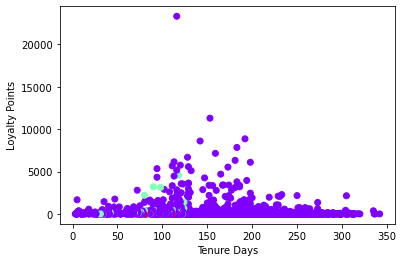

In [117]:
#create a copy of the data variable
x = customers.copy()
# The number in the brackets is K, or the number of clusters we are aiming for, here we take 3 randomly
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)
# Plot the data using the Annual Income and the Spending Score
plt.scatter(clusters['Tenure_Days'],clusters['Loyalty Points'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Tenure Days')
plt.ylabel('Loyalty Points')

In [118]:
#Saving to csv
df_data.to_csv('final_data.csv')